In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt", sep=';')
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17668\971321385.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/hp/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt", sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
for i in data.columns:
    if i == "Date" or i == "Time":
        pass
    else:
        if data[i].dtype == "object" :
            data[i] = pd.to_numeric(data[i], errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [7]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)

In [10]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [11]:
data.set_index('DateTime', inplace=True)

In [12]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<Axes: title={'center': 'Global Active Power Over Time'}, xlabel='DateTime'>

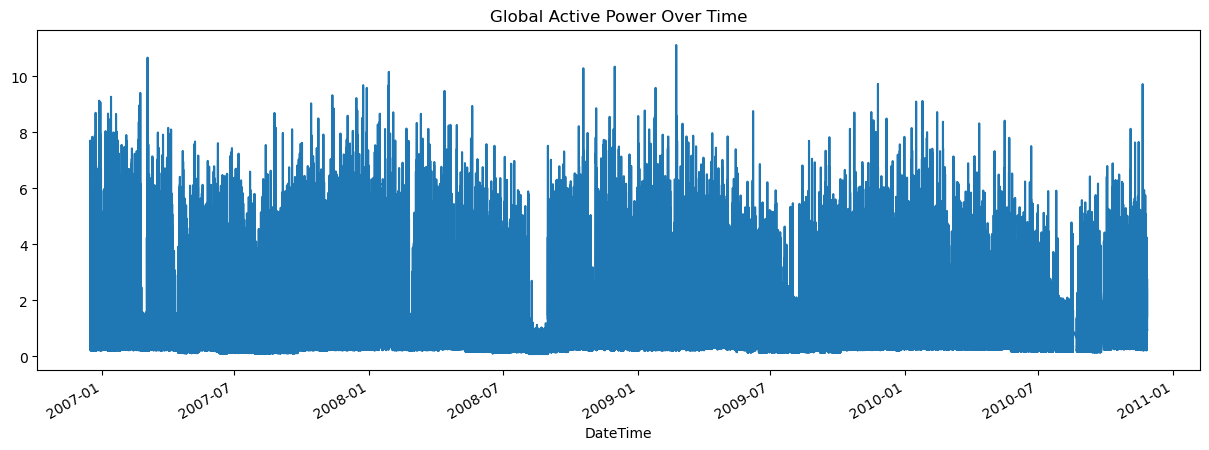

In [15]:
import matplotlib.pyplot as plt

data['Global_active_power'].plot(figsize=(15, 5), title='Global Active Power Over Time')

In [16]:
data['lag_1'] = data['Global_active_power'].shift(1)
data['lag_24'] = data['Global_active_power'].shift(24)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_24
DateTime,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,NaN,NaN
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,4.216,NaN
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5.360,NaN
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5.374,NaN
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5.388,NaN


In [17]:
data.isnull().sum()

Date                      0
Time                      0
Global_active_power       0
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3            0
lag_1                     1
lag_24                   24
dtype: int64

In [18]:
data = data.dropna()
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
lag_1                    0
lag_24                   0
dtype: int64

In [19]:
newdata = pd.DataFrame()
newdata['hour'] = data.index.hour
newdata['day'] = data.index.day
newdata['dayofweek'] = data.index.dayofweek
newdata['month'] = data.index.month
newdata.head()

,hour,day,dayofweek,month
0,17,16,5,12
1,17,16,5,12
2,17,16,5,12
3,17,16,5,12
4,17,16,5,12


In [20]:
data = data.reset_index()
data.head()

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_24
0,2006-12-16 17:48:00,16/12/2006,17:48:00,4.474,0.0,234.96,19.4,0.0,0.0,17.0,5.174,4.216
1,2006-12-16 17:49:00,16/12/2006,17:49:00,3.248,0.0,236.66,13.6,0.0,0.0,17.0,4.474,5.360
2,2006-12-16 17:50:00,16/12/2006,17:50:00,3.236,0.0,235.84,13.6,0.0,0.0,17.0,3.248,5.374
3,2006-12-16 17:51:00,16/12/2006,17:51:00,3.228,0.0,235.60,13.6,0.0,0.0,17.0,3.236,5.388
4,2006-12-16 17:52:00,16/12/2006,17:52:00,3.258,0.0,235.49,13.8,0.0,0.0,17.0,3.228,3.666


In [21]:
newdata['lag_1'] = data['lag_1']
newdata['lag_24'] = data['lag_24']
newdata.head()

,hour,day,dayofweek,month,lag_1,lag_24
0,17,16,5,12,5.174,4.216
1,17,16,5,12,4.474,5.360
2,17,16,5,12,3.248,5.374
3,17,16,5,12,3.236,5.388
4,17,16,5,12,3.228,3.666


In [22]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049256 entries, 0 to 2049255
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   hour       int32  
 1   day        int32  
 2   dayofweek  int32  
 3   month      int32  
 4   lag_1      float64
 5   lag_24     float64
dtypes: float64(2), int32(4)
memory usage: 62.5 MB


In [23]:
newdata = newdata.astype(float)

In [24]:
newdata.isnull().sum()

hour         0
day          0
dayofweek    0
month        0
lag_1        0
lag_24       0
dtype: int64

In [25]:
X = newdata
Y = data["Global_active_power"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False, test_size=0.2)

In [26]:
print("X_train = ", X_train.shape, "\nY_train = ", Y_train.shape, "\nX_test = ", X_test.shape, "\nY_test = ", Y_test.shape)

X_train =  (1639404, 6) 
Y_train =  (1639404,) 
X_test =  (409852, 6) 
Y_test =  (409852,)


In [28]:
X_train.head()

,hour,day,dayofweek,month,lag_1,lag_24
0,17.0,16.0,5.0,12.0,5.174,4.216
1,17.0,16.0,5.0,12.0,4.474,5.360
2,17.0,16.0,5.0,12.0,3.248,5.374
3,17.0,16.0,5.0,12.0,3.236,5.388
4,17.0,16.0,5.0,12.0,3.228,3.666


In [31]:
Y_train.head()

0    4.474
1    3.248
2    3.236
3    3.228
4    3.258
Name: Global_active_power, dtype: float64

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0530
R² Score: 0.9340


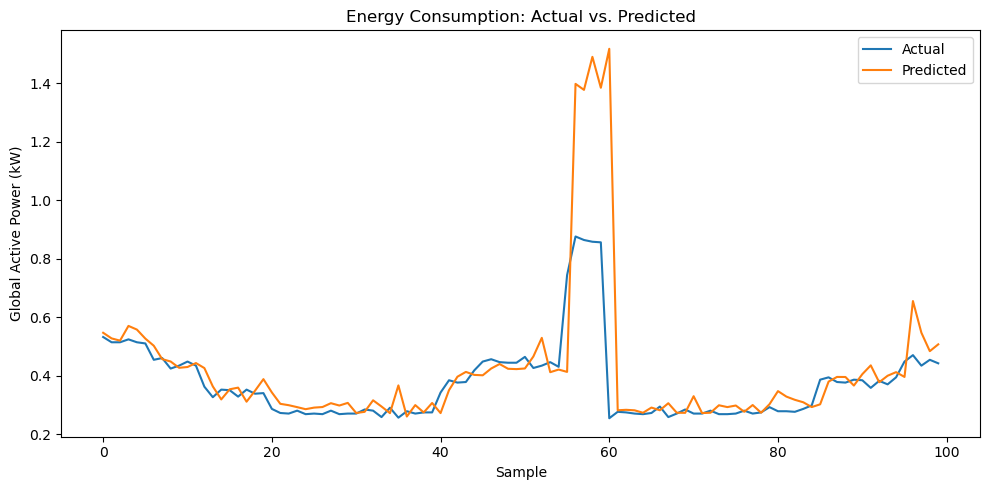

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(Y_test.values[:100], label='Actual')
plt.plot(Y_pred[:100], label='Predicted')
plt.title('Energy Consumption: Actual vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()
